In [1]:
!pip install tensorflow

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#load_data
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [ ]:
len(X_train)

In [ ]:
len(X_test)

In [7]:
type(X_train)

numpy.ndarray

In [8]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [9]:
X_train.shape

(60000, 28, 28)

In [10]:
X_train[0].shape

(28, 28)

In [11]:
for row in X_train[10000]:
    row=row.tolist()
    for i in row:
        print(str(i).ljust(4), end='')
    print()

0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   29  150 195 254 255 254 176 193 150 96  0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   48  166 224 253 253 234 196 253 253 253 253 233 0   0   0   0   0   0   0   0   0   
0   0   0   0   0   93  244 249 253 187 46  10  8   4   10  194 253 253 233 0   0   0   0   0   0   0   0   0   
0   0   0   0   0   107 253 253 230 48  0   0   0   0   0   192 253 253 156 0   0   0   0   0   

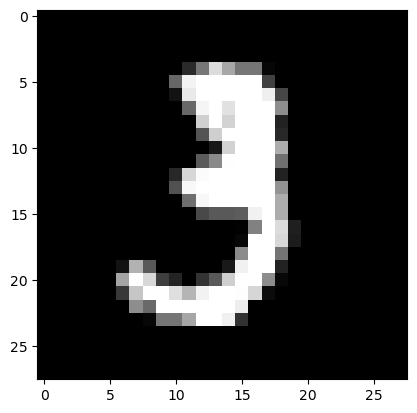

In [12]:
plt.imshow(X_train[10], cmap='gray')

In [13]:
y_train[10]

3

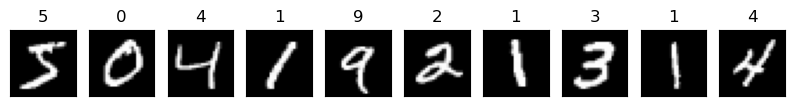

In [14]:
# Display some images
fig, axes = plt.subplots(ncols=10, sharex=False, 
    sharey=True, figsize=(10, 4))
for i in range(10):
    axes[i].set_title(y_train[i])
    axes[i].imshow(X_train[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

In [15]:
X_train=X_train/255
X_test=X_test/255

In [16]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [33]:
model=Sequential()

In [34]:
input_layer=Flatten(input_shape=(28,28))

In [35]:
layer1=Dense(units=150,activation='relu')

In [36]:
layer2=Dense(units=100,activation='sigmoid')

In [37]:
output_layer=Dense(units=10,activation='softmax')

In [38]:
model.add(input_layer)
model.add(layer1)
model.add(layer2)
model.add(output_layer)

In [39]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 150)               117750    
                                                                 
 dense_6 (Dense)             (None, 100)               15100     
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
Total params: 133,860
Trainable params: 133,860
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.weights

[<tf.Variable 'dense_5/kernel:0' shape=(784, 150) dtype=float32, numpy=
 array([[ 0.0629832 ,  0.03751832,  0.05173206, ...,  0.00534104,
         -0.04349655,  0.00133979],
        [-0.03183888, -0.03129866, -0.0281316 , ..., -0.0568979 ,
          0.06415193,  0.03260146],
        [-0.00817539,  0.07306816, -0.01896453, ...,  0.04406769,
         -0.06952839,  0.01546904],
        ...,
        [-0.02207347,  0.0594258 , -0.06825469, ...,  0.06097245,
         -0.03699159, -0.01246347],
        [-0.05768081,  0.0790666 , -0.0749737 , ..., -0.03662575,
         -0.01403006,  0.05309851],
        [ 0.01763681,  0.05343033,  0.07107468, ...,  0.04432889,
          0.06872395, -0.00812937]], dtype=float32)>,
 <tf.Variable 'dense_5/bias:0' shape=(150,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [41]:
model.weights[0]

<tf.Variable 'dense_5/kernel:0' shape=(784, 150) dtype=float32, numpy=
array([[ 0.0629832 ,  0.03751832,  0.05173206, ...,  0.00534104,
        -0.04349655,  0.00133979],
       [-0.03183888, -0.03129866, -0.0281316 , ..., -0.0568979 ,
         0.06415193,  0.03260146],
       [-0.00817539,  0.07306816, -0.01896453, ...,  0.04406769,
        -0.06952839,  0.01546904],
       ...,
       [-0.02207347,  0.0594258 , -0.06825469, ...,  0.06097245,
        -0.03699159, -0.01246347],
       [-0.05768081,  0.0790666 , -0.0749737 , ..., -0.03662575,
        -0.01403006,  0.05309851],
       [ 0.01763681,  0.05343033,  0.07107468, ...,  0.04432889,
         0.06872395, -0.00812937]], dtype=float32)>

In [43]:
model.weights[0][0]

<tf.Tensor: shape=(150,), dtype=float32, numpy=
array([ 0.0629832 ,  0.03751832,  0.05173206,  0.05901682, -0.04903397,
        0.02851976,  0.01416679, -0.05094772, -0.07226396, -0.03121576,
       -0.05513122,  0.00205768, -0.02846323, -0.04820307, -0.07656787,
        0.04293112,  0.03927143,  0.0132578 ,  0.05833344, -0.03884495,
        0.02543175,  0.07960446,  0.05120556, -0.02956767, -0.07413177,
       -0.06738499, -0.03491742,  0.06223856,  0.07587592,  0.02979176,
        0.05826271,  0.02242275, -0.01508894, -0.06479648,  0.04500861,
       -0.02812506,  0.04377022, -0.07774423,  0.01435721, -0.05218338,
       -0.02767978, -0.03671166,  0.00269602,  0.00978567, -0.00556188,
        0.00810836,  0.01447045, -0.03546475,  0.01046081,  0.04338906,
        0.06517276,  0.04805011, -0.04426453, -0.00626137,  0.07910603,
        0.0679716 , -0.01941375, -0.03033783,  0.00063682,  0.07930309,
       -0.04561582, -0.00201579, -0.07019207,  0.03642388,  0.02287376,
       -0.062484

In [44]:
model.weights[0][1]

<tf.Tensor: shape=(150,), dtype=float32, numpy=
array([-0.03183888, -0.03129866, -0.0281316 , -0.07714763, -0.05925066,
       -0.00934944,  0.02765482, -0.02788509, -0.06820446, -0.04435348,
       -0.05007055, -0.06387497,  0.04264577, -0.0680389 ,  0.00224772,
       -0.018181  , -0.07776468, -0.04141004, -0.01389513, -0.05775216,
        0.06516103, -0.01780394,  0.02518068, -0.04211723, -0.02061974,
        0.03575653, -0.00212198, -0.00013506, -0.0744018 ,  0.04983824,
       -0.03904719,  0.05143128, -0.03458748, -0.07854273,  0.05180512,
        0.01588772,  0.05788772,  0.05335726,  0.02879193,  0.06411377,
       -0.00107063,  0.04153161,  0.06624724,  0.06188756, -0.07618949,
        0.05405554, -0.03327149, -0.0300502 ,  0.06638271,  0.06189321,
       -0.0446063 ,  0.04693045, -0.00587609, -0.01608398,  0.03901099,
        0.00546836,  0.06127858, -0.03775133,  0.06320681,  0.02099966,
       -0.03546115, -0.0427181 , -0.07173096,  0.01131918, -0.02191805,
       -0.053817

In [45]:
model.weights[1]

<tf.Variable 'dense_5/bias:0' shape=(150,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)>

In [47]:
model.weights[2]

<tf.Variable 'dense_6/kernel:0' shape=(150, 100) dtype=float32, numpy=
array([[ 0.11204006,  0.09652917, -0.12695019, ..., -0.01108702,
         0.06134823, -0.13706605],
       [-0.05610503,  0.10932778, -0.15302876, ...,  0.12238602,
        -0.04740458, -0.07875593],
       [ 0.01127188, -0.00331727, -0.04530091, ...,  0.0804344 ,
        -0.12699455,  0.05373879],
       ...,
       [-0.10070191, -0.00468186, -0.14941238, ..., -0.10457598,
        -0.06792414,  0.07111527],
       [ 0.14585494, -0.13738795,  0.0398016 , ...,  0.01061763,
         0.02184363, -0.06646729],
       [-0.00728437,  0.133736  , -0.04524484, ...,  0.08761536,
         0.12979464, -0.04692896]], dtype=float32)>

In [52]:
model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [53]:
training_history=model.fit(X_train,y_train,epochs=30,validation_data=(X_test,y_test),verbose=1)

Epoch 1/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6246 - accuracy: 0.8404 - val_loss: 0.3304 - val_accuracy: 0.9100
Epoch 2/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2864 - accuracy: 0.9219 - val_loss: 0.2505 - val_accuracy: 0.9308
Epoch 3/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2265 - accuracy: 0.9363 - val_loss: 0.2072 - val_accuracy: 0.9421
Epoch 4/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1863 - accuracy: 0.9474 - val_loss: 0.1750 - val_accuracy: 0.9503
Epoch 5/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1619 - accuracy: 0.9536 - val_loss: 0.1557 - val_accuracy: 0.9545
Epoch 6/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1442 - accuracy: 0.9582 - val_loss: 0.1576 - val_accuracy: 0.9514
Epoch 7/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1300 - accuracy: 0.9618 - val_loss: 0.1383 - val_accuracy:

In [13]:
model.weights[0][0]

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([ 0.08051987,  0.00264419, -0.00945762,  0.07738686,  0.01519668],
      dtype=float32)>

In [15]:
model.weights[1]

<tf.Variable 'dense/bias:0' shape=(5,) dtype=float32, numpy=
array([-4.19679243e-04,  1.04707115e-05,  1.82379954e-05, -1.18515233e-03,
       -7.10317807e-04], dtype=float32)>

In [ ]:
training_history.history

In [ ]:
result=pd.DataFrame(training_history.history)
result

In [ ]:
result[["loss","val_loss"]].plot()

In [ ]:
result[["accuracy","val_accuracy"]].plot()

In [99]:
y_pred=model.predict(X_test)

313/313 [==============================] - 0s 1ms/step


In [100]:
y_pred

array([[0.04677481, 0.03906905, 0.10259102, ..., 0.2341461 , 0.1801243 ,
        0.1691219 ],
       [0.35625806, 0.06015719, 0.2037315 , ..., 0.01394816, 0.0414588 ,
        0.0146502 ],
       [0.01774704, 0.5410049 , 0.07031505, ..., 0.03431302, 0.07449847,
        0.04247947],
       ...,
       [0.01549449, 0.10441361, 0.03383459, ..., 0.14136115, 0.09182759,
        0.16928475],
       [0.06290364, 0.07202359, 0.04736969, ..., 0.1000461 , 0.11769196,
        0.10442424],
       [0.07655822, 0.03325182, 0.0980291 , ..., 0.03500698, 0.02048348,
        0.04687932]], dtype=float32)

In [101]:
y_pred.shape

(10000, 10)

In [102]:
y_pred.ndim

2

In [104]:
y_pred[0]

array([0.04677481, 0.03906905, 0.10259102, 0.05145361, 0.07067044,
       0.0749623 , 0.03108648, 0.2341461 , 0.1801243 , 0.1691219 ],
      dtype=float32)

In [105]:
y_test[0]

7

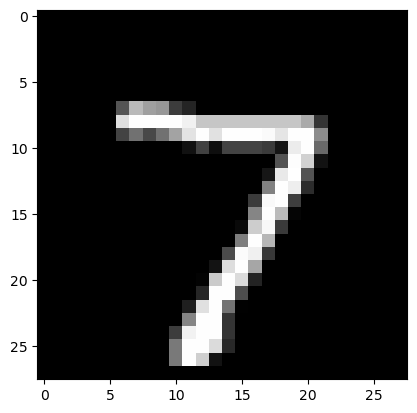

In [106]:
plt.imshow(X_test[0],cmap='gray')

In [107]:
np.argmax(y_pred[0])

7

In [108]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [109]:
y_pred_10=y_pred[0:10]

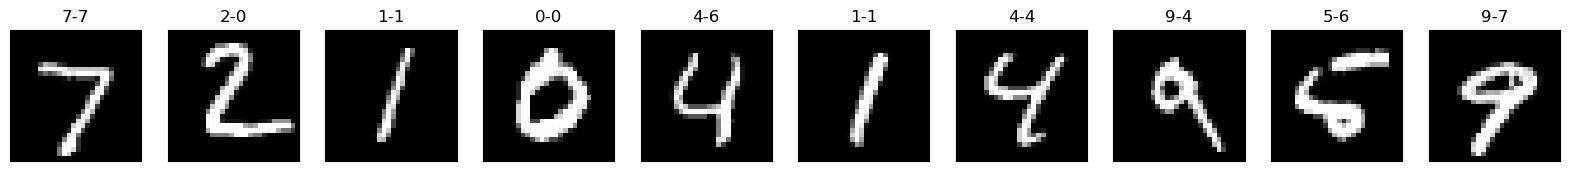

In [110]:
# Display some images
fig, axes = plt.subplots(ncols=10, sharex=False, 
    sharey=True, figsize=(20, 10))
for i in range(10):
    axes[i].set_title(str(y_test[i])+"-"+str(np.argmax(y_pred_10[i])))
    axes[i].imshow(X_test[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

In [111]:
final_y_predicted=np.argmax(y_pred,axis=1)
final_y_predicted

array([7, 0, 1, ..., 4, 5, 6], dtype=int64)

In [112]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=final_y_predicted)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 930,    0,   14,    4,    1,    4,   22,    1,    4,    0],
       [   0, 1122,    2,    1,    1,    0,    3,    0,    6,    0],
       [  82,  135,  701,   17,    1,    1,   61,    5,   28,    1],
       [  33,   55,   17,  793,    2,   13,    5,    6,   84,    2],
       [   1,   23,    5,    1,  636,    3,  249,   50,    5,    9],
       [  97,   15,   17,  315,   29,  343,   41,   10,   23,    2],
       [  40,    7,   16,    1,    1,    4,  889,    0,    0,    0],
       [   8,   52,   17,    1,   37,   22,    2,  715,  166,    8],
       [  21,   89,   19,  121,   16,   10,   31,   44,  618,    5],
       [   6,   21,   31,   10,  239,   17,   23,  556,   35,   71]])>

Text(154.75, 0.5, 'Actual  digit')

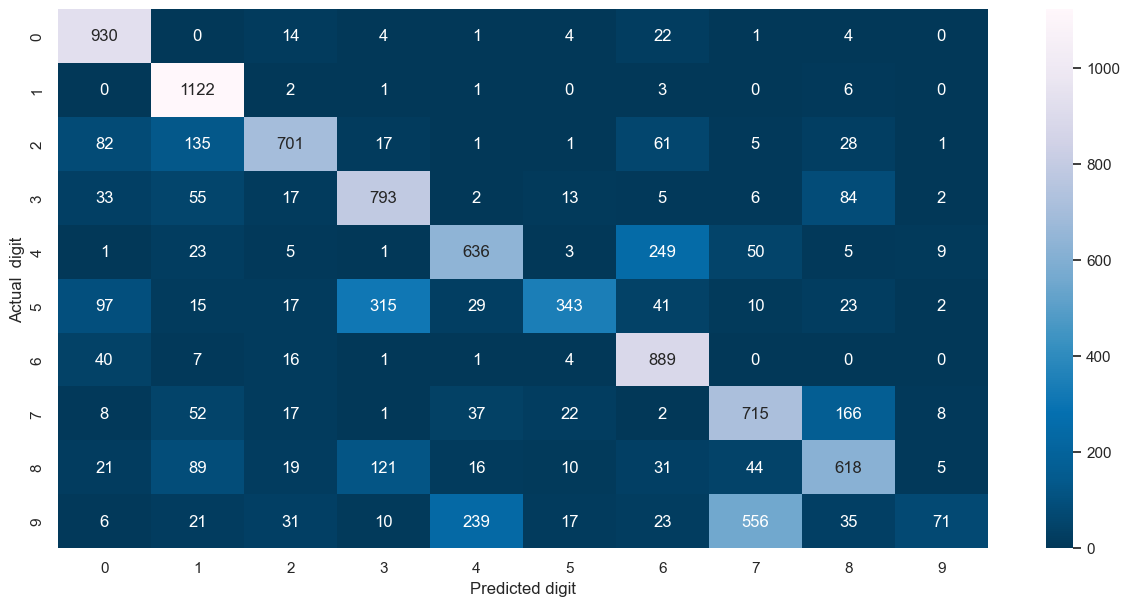

In [113]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15,7)})
sns.heatmap(cm,annot=True,cmap='PuBu_r',fmt='g')
plt.xlabel("Predicted digit")
plt.ylabel("Actual  digit") 